In [1]:
from data import get_df, num_sift_kp
df = get_df()
print("num_sift_kp=" + str(num_sift_kp))
print df.shape
print df.dtypes
print df.head()

num_sift_kp=25
(200, 4)
name                     object
class                  category
sift_key_points          object
sift_kp_descriptors      object
dtype: object
           name class                                    sift_key_points  \
0  image001.JPG     0  [{u'pt': (123.904953003, 140.342391968), u'ang...   
1  image002.JPG     0  [{u'pt': (156.000778198, 182.117752075), u'ang...   
2  image003.JPG     0  [{u'pt': (112.154243469, 122.479042053), u'ang...   
3  image004.JPG     0  [{u'pt': (191.072982788, 121.957305908), u'ang...   
4  image006.JPG     1  [{u'pt': (112.855133057, 91.5557556152), u'ang...   

                                 sift_kp_descriptors  
0  [[20, 59, 25, 58, 16, 2, 2, 1, 76, 75, 47, 47,...  
1  [[7, 19, 8, 1, 1, 0, 16, 16, 6, 16, 20, 11, 1,...  
2  [[138, 2, 0, 0, 55, 7, 0, 3, 53, 10, 0, 0, 142...  
3  [[10, 42, 7, 2, 84, 81, 6, 0, 74, 109, 3, 2, 8...  
4  [[100, 7, 0, 0, 22, 35, 44, 53, 61, 5, 0, 0, 1...  


In [2]:
class_id_filename = dict()
for k, v in zip(df["class"].astype("int8"), df["name"]):
    if k not in class_id_filename:
        class_id_filename[k] = set()
    class_id_filename[k].add(v)
class_id_filename

{0: {'image001.JPG', 'image002.JPG', 'image003.JPG', 'image004.JPG'},
 1: {'image006.JPG', 'image007.JPG', 'image008.JPG', 'image009.JPG'},
 2: {'image011.JPG', 'image012.JPG', 'image013.JPG', 'image014.JPG'},
 3: {'image016.JPG', 'image017.JPG', 'image018.JPG', 'image019.JPG'},
 4: {'image021.JPG', 'image022.JPG', 'image023.JPG', 'image024.JPG'},
 5: {'image031.JPG', 'image032.JPG', 'image033.JPG', 'image034.JPG'},
 6: {'image036.JPG', 'image037.JPG', 'image038.JPG', 'image039.JPG'},
 7: {'image041.JPG', 'image042.JPG', 'image043.JPG', 'image044.JPG'},
 8: {'image046.JPG', 'image047.JPG', 'image048.JPG', 'image049.JPG'},
 9: {'image051.JPG', 'image052.JPG', 'image053.JPG', 'image054.JPG'},
 10: {'image056.JPG', 'image057.JPG', 'image058.JPG', 'image059.JPG'},
 11: {'image061.JPG', 'image062.JPG', 'image063.JPG', 'image064.JPG'},
 12: {'image066.JPG', 'image067.JPG', 'image068.JPG', 'image069.JPG'},
 13: {'image071.JPG', 'image072.JPG', 'image073.JPG', 'image074.JPG'},
 14: {'image076.

In [3]:
import numpy as np
from collections import Counter
pair_counts = Counter()
with open("incorrect_log.txt", mode="r") as h:
    for line in h:
        [correct, incorrect] = line.split(" -> ")
        correct = np.fromstring(correct[1:-1], dtype=np.uint8, sep=" ")
        incorrect = np.fromstring(incorrect[1:-1], dtype=np.uint8, sep=" ")
        pair_counts.update(zip(correct, incorrect))
pair_counts.most_common(10)  # 10 most common errors and their counts

[((2, 3), 270),
 ((16, 10), 258),
 ((20, 5), 241),
 ((33, 2), 219),
 ((16, 37), 194),
 ((23, 13), 179),
 ((37, 39), 165),
 ((16, 38), 136),
 ((2, 26), 131),
 ((39, 37), 130)]

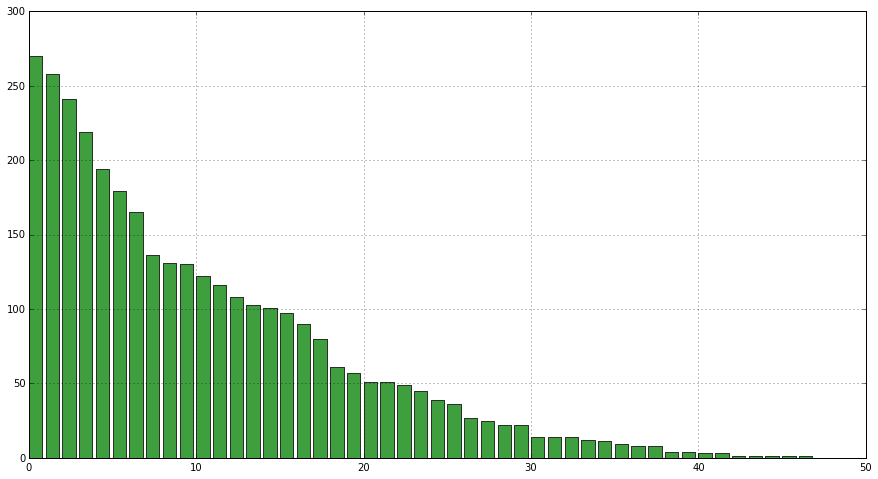

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
pairs, counts = zip(*pair_counts.most_common())
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.bar(np.arange(len(counts)), counts, color="green", alpha=0.75)
ax.grid()

In [8]:
from_counts = dict()
for k, v in zip(zip(*pairs)[0], counts):
    if k not in from_counts:
        from_counts[k] = 0
    from_counts[k] += v
sorted(from_counts.items(), key=lambda x: x[1], reverse=True)

[(16, 733),
 (2, 702),
 (23, 477),
 (37, 444),
 (41, 266),
 (20, 241),
 (33, 219),
 (39, 191),
 (40, 57),
 (0, 4)]